In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [28]:
# Load the cleaned dataset
cleaned_file_path = 'cleaned_dataset.csv' 
df = pd.read_csv(cleaned_file_path)

In [29]:
# Set the style of seaborn
sns.set(style="whitegrid")

In [30]:
# Basic Statistics
print("Basic Statistics:")
print(df.describe(include='all'))

Basic Statistics:
                 _id        NAME           DEPARTMENT_NAME    TITLE  \
count   25624.000000       25624                     25624    25624   
unique           NaN       25553                       233     1536   
top              NaN  Gomez,Juan  Boston Police Department  Teacher   
freq             NaN           3                      2922     5746   
mean    12950.959608         NaN                       NaN      NaN   
std      7418.609665         NaN                       NaN      NaN   
min       109.000000         NaN                       NaN      NaN   
25%      6528.750000         NaN                       NaN      NaN   
50%     12945.500000         NaN                       NaN      NaN   
75%     19372.250000         NaN                       NaN      NaN   
max     25812.000000         NaN                       NaN      NaN   

              REGULAR         RETRO          OTHER       OVERTIME  \
count    23389.000000  14548.000000   17248.000000    7191.0

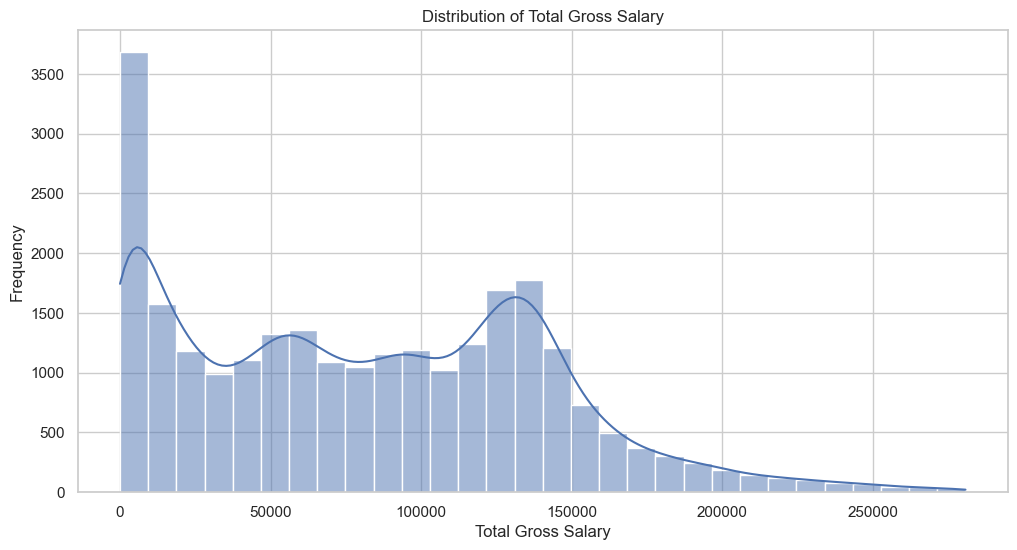

In [31]:
# Data Distribution of Numerical Features
plt.figure(figsize=(12, 6))
sns.histplot(df['TOTAL GROSS'], bins=30, kde=True)
plt.title('Distribution of Total Gross Salary')
plt.xlabel('Total Gross Salary')
plt.ylabel('Frequency')
plt.show()

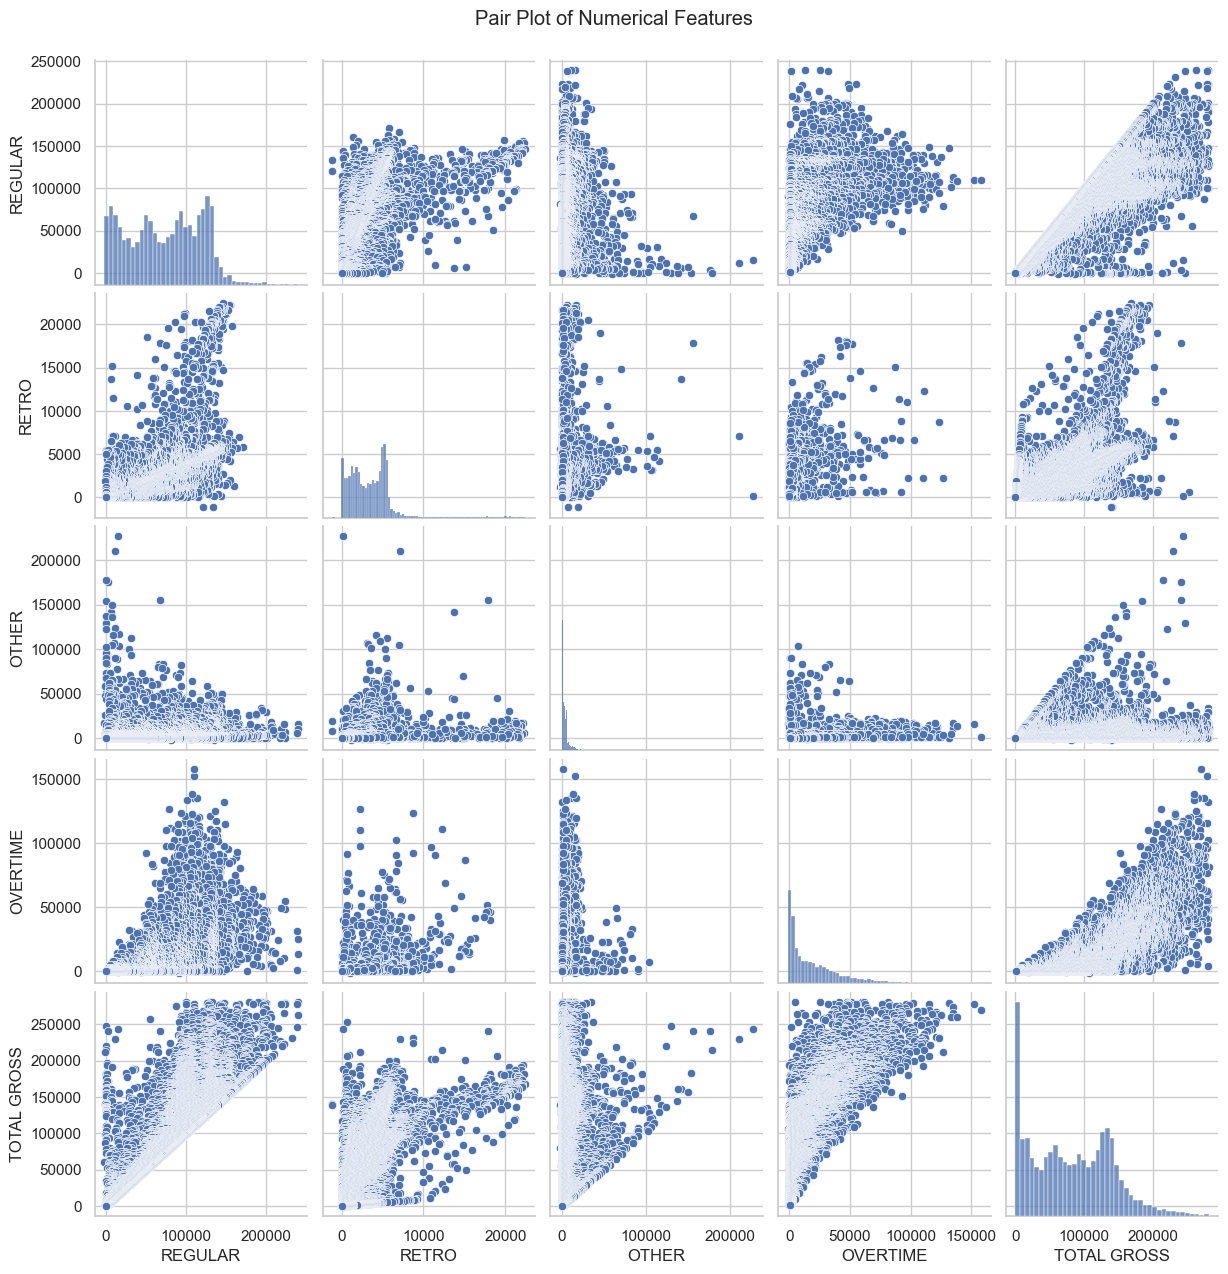

In [32]:
# Pair Plot for Numerical Features
# Select relevant numerical columns for pair plot
numerical_cols = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'TOTAL GROSS']
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

/var/folders/zn/frtcx_8d3mg0lvjd20vlbdh00000gn/T/ipykernel_91868/1000025013.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOTAL GROSS', y='DEPARTMENT_NAME', data=top_departments, palette='Blues')


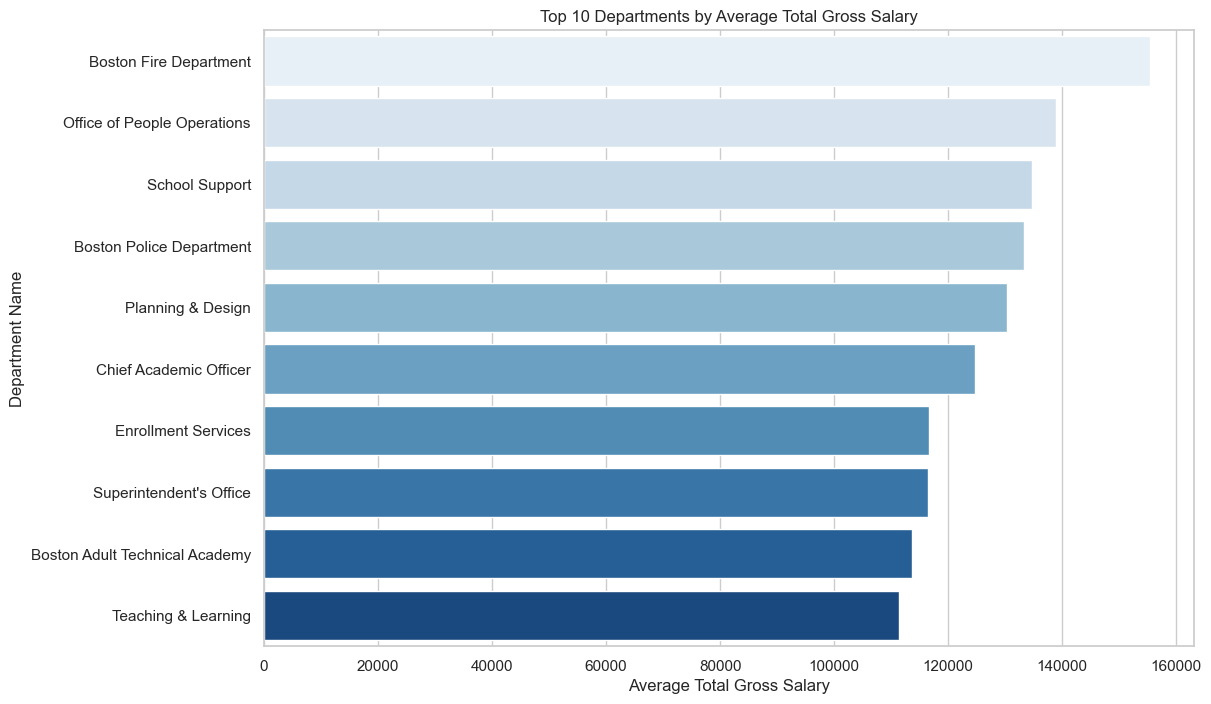

In [33]:
# Calculate average total gross salary for each department
average_income_by_department = df.groupby('DEPARTMENT_NAME')['TOTAL GROSS'].mean().reset_index()

# Sort values by average income
average_income_by_department.sort_values(by='TOTAL GROSS', ascending=False, inplace=True)

# Limit to the top 10 departments
top_departments = average_income_by_department.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='TOTAL GROSS', y='DEPARTMENT_NAME', data=top_departments, palette='Blues')
plt.title('Top 10 Departments by Average Total Gross Salary')
plt.xlabel('Average Total Gross Salary')
plt.ylabel('Department Name')
plt.show()

<Figure size 1400x800 with 0 Axes>

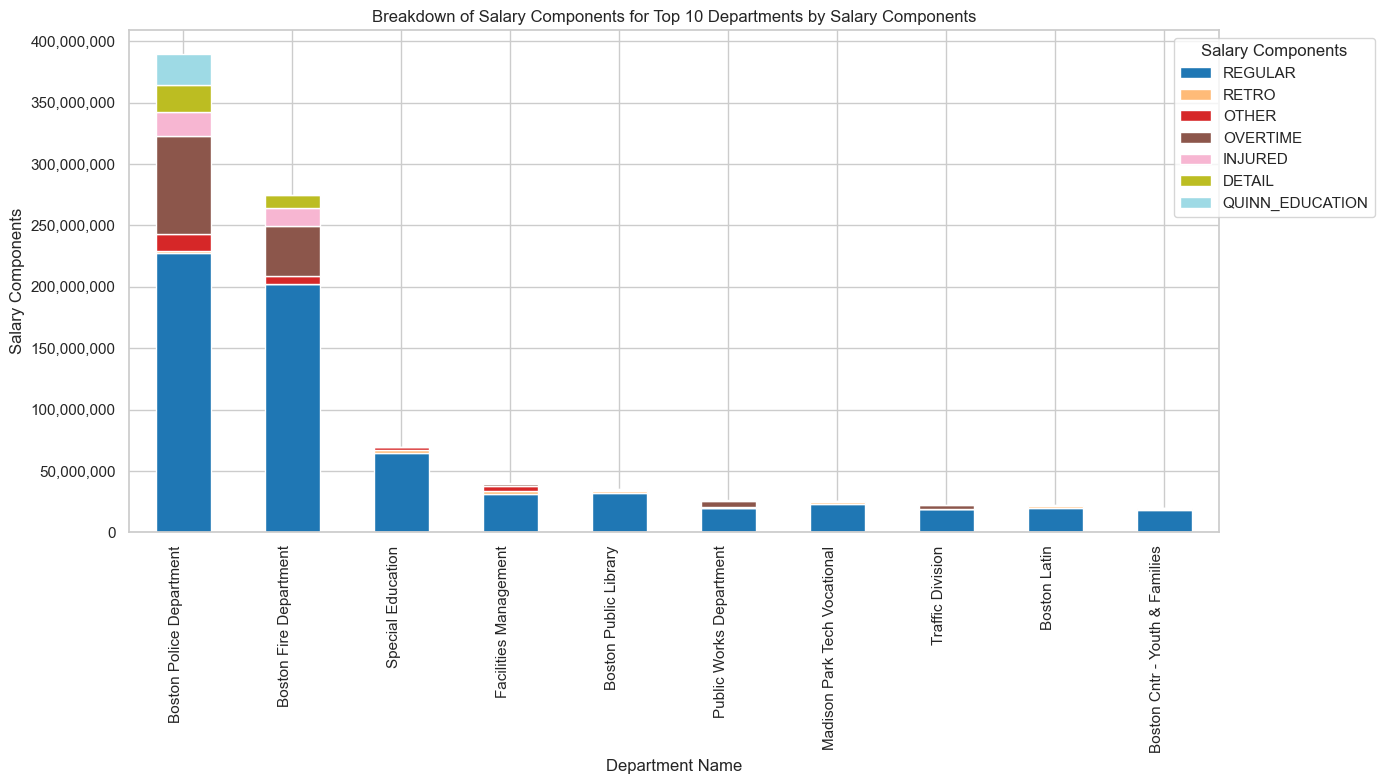

In [34]:
# Group by department and sum the salary components
df_grouped = df.groupby('DEPARTMENT_NAME')[['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION']].sum()

# Sort by total gross salary to get the top 10 departments
df_grouped['TOTAL GROSS CALCULATED'] = df_grouped.sum(axis=1)
top_departments = df_grouped.nlargest(10, 'TOTAL GROSS CALCULATED')

# Plot stacked bar chart for top 10 departments
plt.figure(figsize=(14, 8))
ax = top_departments.drop(columns='TOTAL GROSS CALCULATED').plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20')

# Set the y-axis to display large numbers without scientific notation
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Add titles and labels
plt.title('Breakdown of Salary Components for Top 10 Departments by Salary Components')
plt.xlabel('Department Name')
plt.ylabel('Salary Components')
plt.xticks(rotation=90, ha='right')

# Move the legend outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='Salary Components')

plt.tight_layout()
plt.show()